In [1]:
# Initialize Notebook
from IPython.core.display import HTML,Image
#%run ../library/v1.0.5/init.ipy
HTML('''<script> code_show=true;  function code_toggle() {  if (code_show){  $('div.input').hide();  } else {  $('div.input').show();  }  code_show = !code_show }  $( document ).ready(code_toggle); </script> <form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [27]:
import gc, argparse, sys, os, errno
from IPython.core.display import HTML,Image
from functools import reduce
import h5py
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c
from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [3]:
def embed_pdf_figure(width='640', height='480', title='Image'):
    data = BytesIO()
    plt.savefig(data, format='pdf', metadata={'Title': title})
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
    plt.close()
    

from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from IPython.display import HTML, display, FileLink
from base64 import b64encode, b64decode
from io import StringIO, BytesIO
from contextlib import contextmanager

@contextmanager
def embed_pdf_pages(width=960, height=480, title='Image'):
    data = BytesIO()
    try:
        pdf = PdfPages(data, metadata={'Title': title})
        yield pdf
    finally:
        pdf.close()
        data = data.getvalue()
        data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
        display(HTML('<object width="{}" height="{}" data="{}"></object>'.format(width, height, data)))
        plt.close()

@contextmanager
def embed_pdf_data(width=640, height=480, title='Image'):
    try:
        data = BytesIO()
        yield data
    finally:
        data = data.getvalue()

        data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
        display(HTML('<object width="{}" height="{}" data="{}"></object>'.format(width, height, data)))
        plt.close()

fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax

def gradient_func(val):
    return '<span style="background: linear-gradient(90deg, #d65f5f {0}%, transparent 0%)">{0:.3f}</span>'.format(val)

def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button',gradientfunc=False, **kwargs):
    #display(df)
    #if isinstance(df, pd.DataFrame):
    #    display(df.style.set_caption(filename))
    #else:
    if gradientfunc == False:
        display(df.style.set_caption(filename))    
    else:
        display(df.style.format(gradient_func).set_caption(filename)) 
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href=" " download={filename} target="_blank">{filename}</a >'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [4]:
cd ~/ex

/home/xieyufeng/ex


In [11]:
def interactive_config_settings(dataset,sequencing_type,classifier,value_change,example_cancer,reads_preprocess,stage_info):
    if sequencing_type == 'short':
        exp_mx_name = 'domains_combined'
    elif sequencing_type =='long':
        exp_mx_name = 'featurecounts'
    elif sequencing_type =='domain_only':
        exp_mx_name = 'domains_long'
    elif sequencing_type =='transcript':
        exp_mx_name = 'transcript'
    return dataset,sequencing_type,classifier,value_change,exp_mx_name,example_cancer,reads_preprocess,stage_info

widget =interactive(interactive_config_settings,
           dataset= ['scirep','exorbase','exosome_small','pico_3v3'],
           sequencing_type=['short','long','domain_only','transcript'],
           classifier = ['logistic_regression','linear_svm','random_forest','decision_tree','logistic_regression_l1'],
           value_change = ['any','up','down'],
        example_cancer=['Normal-CRC','Normal-PAAD','Normal-PRAD','Normal-HCC'],
                   reads_preprocess=[True,False],
                   stage_info = ['No Stage','With Stage'])  # if start from preprocessing
display(widget)

interactive(children=(Dropdown(description='dataset', options=('scirep', 'exorbase', 'exosome_small', 'pico_3v3'), value='scirep'), Dropdown(description='sequencing_type', options=('short', 'long', 'domain_only', 'transcript'), value='short'), Dropdown(description='classifier', options=('logistic_regression', 'linear_svm', 'random_forest', 'decision_tree', 'logistic_regression_l1'), value='logistic_regression'), Dropdown(description='value_change', options=('any', 'up', 'down'), value='any'), Dropdown(description='example_cancer', options=('Normal-CRC', 'Normal-PAAD', 'Normal-PRAD', 'Normal-HCC'), value='Normal-CRC'), Dropdown(description='reads_preprocess', options=(True, False), value=True), Dropdown(description='stage_info', options=('No Stage', 'With Stage'), value='No Stage'), Output()), _dom_classes=('widget-interact',))

In [12]:
dataset,sequencing_type,classifier_use,value_change,exp_mx_name,example_cancer,reads_preprocess,stage_info = widget.result
dataset,sequencing_type,classifier_use,value_change,exp_mx_name,example_cancer,reads_preprocess,stage_info


('scirep',
 'short',
 'logistic_regression',
 'any',
 'domains_combined',
 'Normal-CRC',
 True,
 'No Stage')

In [13]:
file_counts = 'output/'+dataset+'/summary/read_counts.txt'
file_length_path = 'output/'+dataset+'/stats/mapped_read_length_by_sample/'
file_length_path_insert = 'output/'+dataset+'/stats/mapped_insert_size_by_sample/'
plot_save_path = 'output/'+dataset+'/plots/'

    
import datetime
now = datetime.datetime.now()
timenow = '{}.{}.{}.{}:{}'.format(now.year,now.month,now.day,now.hour,now.minute)
savepath = 'output/candidate/'+dataset+'/'+dataset+'.'+sequencing_type+'.'+classifier_use+'.'+value_change+'.'+timenow+'/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

In [9]:
example_cancer

'Normal-CRC'

In [14]:
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'
original_mx = pd.read_table(original_mx_file,index_col=0)

In [15]:
if dataset =='scirep':
    compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']
elif dataset =='exorbase':
    compare_group_list = ['Normal-HCC','Normal-CRC','Normal-PAAD']
elif dataset =='pico_3v3':
    compare_group_list = ['Normal-CRC']

In [16]:
def volcano_plot():
    for compare_group in compare_group_list:
        detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                                ,index_col=0)
        de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                                  'log2FoldChange':detable['log2FoldChange'].tolist(),
                                  'padj':detable['padj'].tolist()})
        de_plot_mx.set_index('feature',inplace=True)
        de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
        de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
        #de_plot_mx.iloc[np.where(de_plot_mx['threshold']==True)]
        de_plot_mx['color'] = de_plot_mx['threshold']
        for i in np.where(de_plot_mx['threshold']==True):
            de_plot_mx['color'][i]='#DA706F'
        for i in np.where(de_plot_mx['threshold']==False):
            de_plot_mx['color'][i]='#5876B9'

        fig,ax=plt.subplots(figsize=(4,4))
        ax.scatter(de_plot_mx['log2FoldChange'], de_plot_mx['-log10(q values)'], c=de_plot_mx['color'],s=10,alpha=0.8,edgecolors='none')
        ax.vlines(-1,-1,10,linewidth=0.5)
        ax.vlines(1,-1,10,linewidth=0.5)
        ax.hlines(-math.log10(0.05),-4,4,linewidth=0.5)
        std_plot(ax,'log2FoldChange','-log10(q values)','volcano plot of '+compare_group,ylim=[-2,18])
        ax.tick_params(direction='out', pad=2)
        fig.tight_layout()
        fig.savefig(savepath+'volcano plot of '+compare_group+'.eps')
        embed_pdf_figure()
volcano_plot()

In [17]:
if dataset=='scirep':
    if stage_info =='No Stage':
        class_info = 'data/'+dataset+'/sample_classes.no_stage.txt'
    else:
        class_info = 'data/'+dataset+'/sample_classes.txt'
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'

original_mx = pd.read_table(original_mx_file,index_col=0)
sample_class = pd.read_table(class_info,sep='\t',index_col=0)

In [18]:
def heamap_plot(mat,sample_class):
    factor = mat.sum(axis=0)/np.mean(mat.sum(axis=0))
    norm_mx = (mat/factor+1).apply(np.log2,0)

    for compare_group in compare_group_list:
        if compare_group == 'Normal-CRC':
            class_select = ['Healthy Control','Colorectal Cancer']
        if compare_group == 'Normal-PAAD':
            class_select = ['Healthy Control','Pancreatic Cancer']
        if compare_group == 'Normal-PRAD':
            class_select = ['Healthy Control','Prostate Cancer']
        ## z score
        norm_mx_delete = norm_mx
        for i in norm_mx_delete.columns:
            if not np.isin(sample_class.loc[i]['label'],class_select):
                norm_mx_delete = norm_mx_delete.drop(columns=[i])
        norm_z_mx = norm_mx_delete.apply(scipy.stats.zscore,1)
        ## delete
        
        detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                                ,index_col=0)
        de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                                  'log2FoldChange':detable['log2FoldChange'].tolist(),
                                  'padj':detable['padj'].tolist()})
        de_plot_mx.set_index('feature',inplace=True)
        de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
        de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
        
        de_mx = norm_z_mx.loc[detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index]
        #display(de_plot_mx.sort_values('-log10(q values)',ascending=False))
        #display(de_mx)
        #display(detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index)
        ## add cbar
        type_select = pd.DataFrame(sample_class.loc[i] for i in de_mx.columns)
        type_color = dict(zip(np.unique(type_select), ("#DA706F","#5876B9")))
        column_colors = type_select['label'].map(type_color)
        import seaborn as sns
        #fig, ax = plt.subplots(figsize=(7,7))
        tmpind = de_mx.index
        tmpind = np.array([tmpind[i].split('|')[0]+'|'+tmpind[i].split('|')[1]+'|'+tmpind[i].split('|')[2] for i in range(tmpind.shape[0])])
        de_mx.index = tmpind
        g = sns.clustermap(de_mx, row_cluster=False,cmap="vlag",
                       col_colors=column_colors,linewidths=.005,vmax=3,vmin=-3)#,z_score=0)
        #plt.tight_layout()
        g.savefig(savepath+compare_group+'_DE_heatmap.pdf')
        #download_figure(compare_group,format='eps')
        with embed_pdf_data() as data:
            #g = sns.clustermap(m)
            g.savefig(data, format='pdf', metadata={'Title': compare_group})
        #embed_pdf_figure(960,320)
heamap_plot(original_mx,sample_class)


In [20]:
compare_group = 'Normal-PAAD'
class_select = ['Healthy Control','Pancreatic Cancer']

In [30]:
mat = original_mx
sample_class = sample_class
factor = mat.sum(axis=0)/np.mean(mat.sum(axis=0))
norm_mx = (mat/factor+1).apply(np.log2,0)

for compare_group in compare_group_list:
    if compare_group == 'Normal-CRC':
        class_select = ['Healthy Control','Colorectal Cancer']
    if compare_group == 'Normal-PAAD':
        class_select = ['Healthy Control','Pancreatic Cancer']
    if compare_group == 'Normal-PRAD':
        class_select = ['Healthy Control','Prostate Cancer']
    ## z score
    norm_mx_delete = norm_mx
    for i in norm_mx_delete.columns:
        if not np.isin(sample_class.loc[i]['label'],class_select):
            norm_mx_delete = norm_mx_delete.drop(columns=[i])
    norm_z_mx = norm_mx_delete.apply(scipy.stats.zscore,1)
    ## delete

    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                            ,index_col=0)
    de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                              'log2FoldChange':detable['log2FoldChange'].tolist(),
                              'padj':detable['padj'].tolist()})
    de_plot_mx.set_index('feature',inplace=True)
    de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
    de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]

    de_mx = norm_z_mx.loc[detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index]

In [89]:
de_mx

,Sample_N1,Sample_N7,Sample_N13,Sample_N19,Sample_N25,Sample_N31,Sample_N37,Sample_N43,Sample_N2,Sample_N8,...,Sample_N50,Sample_PC5,Sample_PC11,Sample_PC17,Sample_PC25,Sample_PC35,Sample_N49,Sample_PC6,Sample_PC12,Sample_PC26
chrX_137358980_137359020_+|genomic|chrX_137358980_137359020_+|peak_5426|chrX|137358980|137359020,0.052509,0.285525,0.304467,0.480876,-0.069338,-0.125649,-0.437762,-0.295494,-0.079859,0.034242,...,0.116906,-0.180702,2.767984,-1.743728,-0.208670,-0.648954,-1.192773,0.214178,3.101528,-0.104894
chr9_84980980_84981020_-|genomic|chr9_84980980_84981020_-|peak_5194|chr9|84980980|84981020,-0.302912,0.115903,0.336315,0.098011,-0.235904,-0.405342,-0.631761,-0.306121,-0.203116,-0.037184,...,0.084311,0.478643,2.884931,-1.692970,-0.534170,-0.825568,-2.089342,0.253285,3.239388,0.083230
chr22_42453300_42453340_-|genomic|chr22_42453300_42453340_-|peak_3919|chr22|42453300|42453340,0.030346,0.354100,0.360490,0.335945,-0.186938,-0.083592,-0.404781,-0.207964,-0.467572,0.131520,...,0.202431,-0.115527,2.786415,-1.722766,-0.052145,-0.432802,-1.958804,0.103195,3.123910,-0.060930
chr5_61290640_61290680_+|genomic|chr5_61290640_61290680_+|peak_4429|chr5|61290640|61290680,-0.279158,0.074199,0.193362,0.116475,-0.422928,-0.371283,-0.686523,-0.126098,-0.519379,0.097335,...,-0.253732,0.565121,2.995460,-1.653385,-0.304705,-0.514810,-1.462692,0.309130,3.419902,0.111248
chr14_24413040_24413080_-|genomic|chr14_24413040_24413080_-|peak_2722|chr14|24413040|24413080,-0.233110,0.116862,0.283560,0.219667,-0.225623,0.037214,-0.197893,0.049760,-0.253242,-0.087949,...,0.167056,0.080664,2.659516,-2.277315,-0.016747,-0.518934,-2.146312,0.293442,2.942412,0.041550
chr8_48570860_48570900_-|genomic|chr8_48570860_48570900_-|peak_5026|chr8|48570860|48570900,-0.046493,-0.049253,0.370279,0.127075,-0.116932,-0.087982,-0.236799,-0.253403,-0.380578,0.027135,...,-0.128707,0.462408,2.684105,-2.134955,0.055770,-0.570667,-1.809477,0.286479,3.024920,0.051499
chr18_61798220_61798260_+|genomic|chr18_61798220_61798260_+|peak_3281|chr18|61798220|61798260,-0.179554,0.156455,0.395841,0.195227,-0.598841,-0.473022,-0.568687,-0.206106,-0.226398,0.191882,...,0.184330,0.426619,2.850265,-1.784219,-0.146301,-0.624747,-1.750143,0.260430,3.208627,0.023727
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST00000626826.1|113500|113580,1.882449,1.350947,1.275510,1.344878,0.009863,0.019032,0.458020,-0.580643,1.267206,-0.026434,...,0.222526,1.151638,-1.020839,-0.662220,-1.941682,-1.106129,0.220212,-1.135644,-0.074982,-0.350132
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|ENST00000623130.1|56560|56620,1.744941,1.277807,1.340657,1.498345,0.217363,-0.167888,0.475259,-0.402364,1.087212,0.395526,...,0.133429,0.792418,-1.108385,-0.483290,-1.620763,-1.280303,0.272186,-0.790989,0.015894,-0.457381
ENSG00000276788.1|snoRNA|SNORD26|peak_721|ENST00000384147.1|20|75,2.051288,0.413974,0.727686,0.307567,0.560948,0.233438,0.394306,-0.267926,0.964352,0.227254,...,-0.368440,-0.521816,-1.108257,-0.848640,-1.601348,-1.086784,0.308146,-0.439955,0.017790,-2.618570


In [33]:
sample_class_de = sample_class[(sample_class['label']==class_select[0])|(sample_class['label']==class_select[1])]

In [90]:
sample_class_de

,label
sample_id,
Sample_N1,Healthy Control
Sample_N7,Healthy Control
Sample_N13,Healthy Control
Sample_N19,Healthy Control
Sample_N25,Healthy Control
Sample_N31,Healthy Control
Sample_N37,Healthy Control
Sample_N43,Healthy Control
Sample_N2,Healthy Control


In [120]:
norm_mat_de = norm_z_mx[list(sample_class_de.index)].loc[de_mx.index]

In [121]:
norm_mat_de

,Sample_N1,Sample_N7,Sample_N13,Sample_N19,Sample_N25,Sample_N31,Sample_N37,Sample_N43,Sample_N2,Sample_N8,...,Sample_N50,Sample_PC5,Sample_PC11,Sample_PC17,Sample_PC25,Sample_PC35,Sample_N49,Sample_PC6,Sample_PC12,Sample_PC26
chrX_137358980_137359020_+|genomic|chrX_137358980_137359020_+|peak_5426|chrX|137358980|137359020,0.052509,0.285525,0.304467,0.480876,-0.069338,-0.125649,-0.437762,-0.295494,-0.079859,0.034242,...,0.116906,-0.180702,2.767984,-1.743728,-0.208670,-0.648954,-1.192773,0.214178,3.101528,-0.104894
chr9_84980980_84981020_-|genomic|chr9_84980980_84981020_-|peak_5194|chr9|84980980|84981020,-0.302912,0.115903,0.336315,0.098011,-0.235904,-0.405342,-0.631761,-0.306121,-0.203116,-0.037184,...,0.084311,0.478643,2.884931,-1.692970,-0.534170,-0.825568,-2.089342,0.253285,3.239388,0.083230
chr22_42453300_42453340_-|genomic|chr22_42453300_42453340_-|peak_3919|chr22|42453300|42453340,0.030346,0.354100,0.360490,0.335945,-0.186938,-0.083592,-0.404781,-0.207964,-0.467572,0.131520,...,0.202431,-0.115527,2.786415,-1.722766,-0.052145,-0.432802,-1.958804,0.103195,3.123910,-0.060930
chr5_61290640_61290680_+|genomic|chr5_61290640_61290680_+|peak_4429|chr5|61290640|61290680,-0.279158,0.074199,0.193362,0.116475,-0.422928,-0.371283,-0.686523,-0.126098,-0.519379,0.097335,...,-0.253732,0.565121,2.995460,-1.653385,-0.304705,-0.514810,-1.462692,0.309130,3.419902,0.111248
chr14_24413040_24413080_-|genomic|chr14_24413040_24413080_-|peak_2722|chr14|24413040|24413080,-0.233110,0.116862,0.283560,0.219667,-0.225623,0.037214,-0.197893,0.049760,-0.253242,-0.087949,...,0.167056,0.080664,2.659516,-2.277315,-0.016747,-0.518934,-2.146312,0.293442,2.942412,0.041550
chr8_48570860_48570900_-|genomic|chr8_48570860_48570900_-|peak_5026|chr8|48570860|48570900,-0.046493,-0.049253,0.370279,0.127075,-0.116932,-0.087982,-0.236799,-0.253403,-0.380578,0.027135,...,-0.128707,0.462408,2.684105,-2.134955,0.055770,-0.570667,-1.809477,0.286479,3.024920,0.051499
chr18_61798220_61798260_+|genomic|chr18_61798220_61798260_+|peak_3281|chr18|61798220|61798260,-0.179554,0.156455,0.395841,0.195227,-0.598841,-0.473022,-0.568687,-0.206106,-0.226398,0.191882,...,0.184330,0.426619,2.850265,-1.784219,-0.146301,-0.624747,-1.750143,0.260430,3.208627,0.023727
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST00000626826.1|113500|113580,1.882449,1.350947,1.275510,1.344878,0.009863,0.019032,0.458020,-0.580643,1.267206,-0.026434,...,0.222526,1.151638,-1.020839,-0.662220,-1.941682,-1.106129,0.220212,-1.135644,-0.074982,-0.350132
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|ENST00000623130.1|56560|56620,1.744941,1.277807,1.340657,1.498345,0.217363,-0.167888,0.475259,-0.402364,1.087212,0.395526,...,0.133429,0.792418,-1.108385,-0.483290,-1.620763,-1.280303,0.272186,-0.790989,0.015894,-0.457381
ENSG00000276788.1|snoRNA|SNORD26|peak_721|ENST00000384147.1|20|75,2.051288,0.413974,0.727686,0.307567,0.560948,0.233438,0.394306,-0.267926,0.964352,0.227254,...,-0.368440,-0.521816,-1.108257,-0.848640,-1.601348,-1.086784,0.308146,-0.439955,0.017790,-2.618570


In [132]:
top1 = pd.DataFrame(norm_mat_de.iloc[1])
top1

,chr9_84980980_84981020_-|genomic|chr9_84980980_84981020_-|peak_5194|chr9|84980980|84981020
Sample_N1,-0.302912
Sample_N7,0.115903
Sample_N13,0.336315
Sample_N19,0.098011
Sample_N25,-0.235904
Sample_N31,-0.405342
Sample_N37,-0.631761
Sample_N43,-0.306121
Sample_N2,-0.203116
Sample_N8,-0.037184


In [133]:
plot = pd.concat([top1, sample_class_de], axis=1, join_axes=[top1.index])

In [134]:
plot

,chr9_84980980_84981020_-|genomic|chr9_84980980_84981020_-|peak_5194|chr9|84980980|84981020,label
Sample_N1,-0.302912,Healthy Control
Sample_N7,0.115903,Healthy Control
Sample_N13,0.336315,Healthy Control
Sample_N19,0.098011,Healthy Control
Sample_N25,-0.235904,Healthy Control
Sample_N31,-0.405342,Healthy Control
Sample_N37,-0.631761,Healthy Control
Sample_N43,-0.306121,Healthy Control
Sample_N2,-0.203116,Healthy Control
Sample_N8,-0.037184,Healthy Control


In [135]:
featurename = plot.columns[0]
plot = plot.rename(columns={featurename:'counts'})

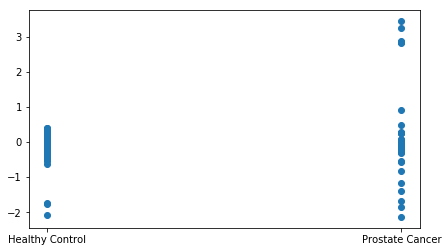

In [136]:
fig,ax = plt.subplots(figsize=(7,4))
ax.scatter(x=plot['label'],y = plot['counts'])

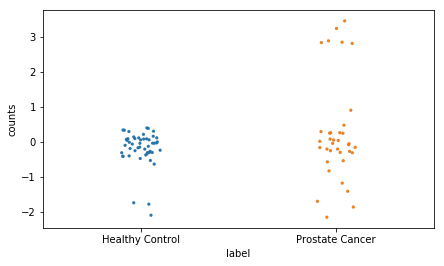

In [137]:
fig,ax = plt.subplots(figsize=(7,4))
sns.stripplot(x="label", y="counts", data=plot,jitter=True, linewidth=0.1,size=3)#,color='grey')

In [138]:
fpr, tpr, thresholds = metrics.roc_curve(plot.label.tolist(), 
                                         plot.counts.tolist(), 
                                         pos_label='Prostate Cancer')

In [139]:
roc_auc = auc(fpr, tpr)

In [140]:
metrics.roc_curve(plot.label.tolist(), 
                                         plot.counts.tolist(), 
                                         pos_label='Prostate Cancer')

(array([0.  , 0.  , 0.12, 0.12, 0.3 , 0.3 , 0.36, 0.36, 0.38, 0.38, 0.5 ,
        0.5 , 0.52, 0.52, 0.58, 0.58, 0.62, 0.62, 0.64, 0.64, 0.68, 0.68,
        0.7 , 0.7 , 0.78, 0.78, 0.92, 0.92, 0.94, 0.94, 0.98, 0.98, 1.  ,
        1.  ]),
 array([0.02777778, 0.22222222, 0.22222222, 0.36111111, 0.36111111,
        0.38888889, 0.38888889, 0.41666667, 0.41666667, 0.47222222,
        0.47222222, 0.52777778, 0.52777778, 0.55555556, 0.55555556,
        0.61111111, 0.61111111, 0.63888889, 0.63888889, 0.66666667,
        0.66666667, 0.69444444, 0.69444444, 0.75      , 0.75      ,
        0.77777778, 0.77777778, 0.83333333, 0.83333333, 0.94444444,
        0.94444444, 0.97222222, 0.97222222, 1.        ]),
 array([ 3.45449895,  0.47864262,  0.29861373,  0.24944534,  0.08431117,
         0.08322973,  0.06120021,  0.05726521,  0.04540436,  0.01801964,
        -0.03775272, -0.04935307, -0.05985449, -0.07629978, -0.1482486 ,
        -0.15880951, -0.18604421, -0.20220289, -0.20311565, -0.20315346,
    

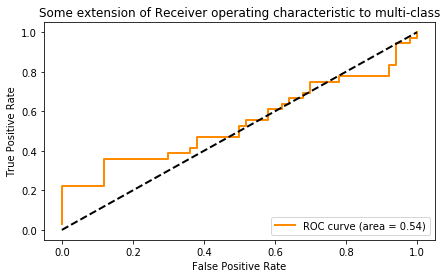

In [141]:
plt.subplots(figsize=(7,4))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [148]:
def select_samples_by_class(matrix, sample_classes, positive_class=None, negative_class=None):
    '''
    Args:
        matrix: 
            pandas DataFrame: [n_samples, n_features]
        sample_classes: 
            pandas Series. Index are sample ids. Values are sample classes.
    Returns:
        X: pandas DataFrame
        y: ndarray
    '''
    if (positive_class is not None) and (negative_class is not None):
        positive_class = positive_class.split(',')
        negative_class = negative_class.split(',')
    else:
        unique_classes = np.unique(sample_classes.values)
        if len(unique_classes) != 2:
            raise ValueError('expect 2 classes but {} classes found'.format(len(unique_classes)))
        positive_class, negative_class = unique_classes
    positive_class = np.atleast_1d(positive_class)
    negative_class = np.atleast_1d(negative_class)

    #logger.info('positive class: {}, negative class: {}'.format(positive_class, negative_class))
    X_pos = matrix.loc[sample_classes[sample_classes.isin(positive_class)].index.values]
    X_neg = matrix.loc[sample_classes[sample_classes.isin(negative_class)].index.values]
    #logger.info('number of positive samples: {}, negative samples: {}, class ratio: {}'.format(
    #    X_pos.shape[0], X_neg.shape[0], float(X_pos.shape[0])/X_neg.shape[0]))
    X = pd.concat([X_pos, X_neg], axis=0)
    y = np.zeros(X.shape[0], dtype=np.int32)
    y[X_pos.shape[0]:] = 1
    del X_pos
    del X_neg

    return X, y

In [150]:
mat

,Sample_1S3,Sample_1S6,Sample_1S9,Sample_1S12,Sample_1S15,Sample_1S18,Sample_1S21,Sample_1S24,Sample_4S2,Sample_4S5,...,Sample_4S16,Sample_4S19,Sample_4S22,Sample_4S25,Sample_N49,Sample_Pan05,Sample_Pan06,Sample_PC6,Sample_PC12,Sample_PC26
feature,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7a-2-3p|hsa-let-7a-2-3p|0|22,9,14,3,1,6,1,6,8,14,6,...,18,3,6,5,11,1,1,7,12,10
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21,283,503,214,153,451,165,435,564,659,421,...,733,185,224,685,837,186,166,294,647,498
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p|hsa-let-7a-5p|0|22,2460,6617,2140,1718,3872,1757,4559,6526,6476,7779,...,11828,1815,2512,6301,7514,1539,1457,2386,5836,4888
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p|hsa-let-7b-3p|0|22,230,340,147,219,207,122,189,278,335,458,...,504,174,278,308,367,124,128,265,395,219
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p|hsa-let-7b-5p|0|22,56569,55954,51215,55669,23908,25192,32174,58741,53344,45357,...,63867,37678,43107,37548,61921,16446,16151,59529,59295,57452
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p|hsa-let-7c-3p|0|22,29,53,32,20,29,12,25,39,69,60,...,56,26,15,49,85,11,18,27,57,24
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p|hsa-let-7c-5p|0|22,3312,5772,2920,2358,2902,1783,3801,5788,5670,5491,...,8338,2396,3010,5211,6180,1286,1449,3413,7459,8590
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p|hsa-let-7d-3p|0|22,2222,3826,1630,1255,2124,1065,1916,2713,3902,5412,...,4763,1629,2012,2946,3725,987,944,2687,4298,1958
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p|hsa-let-7d-5p|0|22,946,1625,736,572,1082,637,1307,1933,1647,2050,...,3332,866,997,1786,2042,570,502,950,1767,1571


In [152]:
#logger = logging.getLogger('feature_selection.' + args.command)
X,y = select_samples_by_class(mat.T, sample_class, positive_class='Healthy Control', negative_class='Prostate Cancer')

In [156]:
def get_splitter(splitter, n_splits=5, n_repeats=5, test_size=0.2):
    if splitter == 'kfold':
        return KFold(n_splits=n_splits)
    elif splitter == 'stratified_kfold':
        return StratifiedKFold(n_splits=n_splits)
    elif splitter == 'repeated_stratified_kfold':
        return RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    elif splitter == 'shuffle_split':
        return ShuffleSplit(n_splits=n_splits, test_size=test_size)
    elif splitter == 'stratified_shuffle_split':
        return StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size)
    elif splitter == 'leave_one_out':
        return LeaveOneOut()
    else:
        raise ValueError('unknown splitter: {}'.format(splitter))
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, LeaveOneOut, \
        RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, StratifiedShuffleSplit       
get_splitter('stratified_kfold', n_splits=5, n_repeats=5, test_size=0.2)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [157]:
splitter = get_splitter('stratified_kfold', n_splits=5, n_repeats=5, test_size=0.2)
metrics = []


In [162]:
X

feature,hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7a-2-3p|hsa-let-7a-2-3p|0|22,hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21,hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p|hsa-let-7a-5p|0|22,hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p|hsa-let-7b-3p|0|22,hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p|hsa-let-7b-5p|0|22,hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p|hsa-let-7c-3p|0|22,hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p|hsa-let-7c-5p|0|22,hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p|hsa-let-7d-3p|0|22,hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p|hsa-let-7d-5p|0|22,hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p|hsa-let-7e-3p|0|22,...,chrY_13897780_13897800_+|genomic|chrY_13897780_13897800_+|peak_5469|chrY|13897780|13897800,chrY_18615500_18615540_-|genomic|chrY_18615500_18615540_-|peak_5470|chrY|18615500|18615540,chrY_18704860_18704900_+|genomic|chrY_18704860_18704900_+|peak_5471|chrY|18704860|18704900,chrY_19204580_19204620_-|genomic|chrY_19204580_19204620_-|peak_5472|chrY|19204580|19204620,chrY_19298480_19298520_-|genomic|chrY_19298480_19298520_-|peak_5473|chrY|19298480|19298520,chrY_22279600_22279640_-|genomic|chrY_22279600_22279640_-|peak_5474|chrY|22279600|22279640,chrY_23396000_23396040_+|genomic|chrY_23396000_23396040_+|peak_5475|chrY|23396000|23396040,chrY_24209980_24210020_-|genomic|chrY_24209980_24210020_-|peak_5476|chrY|24209980|24210020,chrY_25460120_25460160_+|genomic|chrY_25460120_25460160_+|peak_5477|chrY|25460120|25460160,chrY_26274560_26274620_-|genomic|chrY_26274560_26274620_-|peak_5478|chrY|26274560|26274620
Sample_1S3,9,283,2460,230,56569,29,3312,2222,946,75,...,8,19,16,18,35,7,13,16,25,16
Sample_1S6,14,503,6617,340,55954,53,5772,3826,1625,169,...,2,18,23,9,27,92,17,7,9,32
Sample_1S9,3,214,2140,147,51215,32,2920,1630,736,73,...,22,11,10,11,19,4,10,11,17,14
Sample_1S12,1,153,1718,219,55669,20,2358,1255,572,49,...,0,10,10,0,0,7,7,11,10,13
Sample_1S15,6,451,3872,207,23908,29,2902,2124,1082,87,...,7,16,13,7,22,3,15,4,11,13
Sample_1S18,1,165,1757,122,25192,12,1783,1065,637,42,...,8,10,4,20,30,2,6,16,15,8
Sample_1S21,6,435,4559,189,32174,25,3801,1916,1307,99,...,12,12,10,7,17,46,16,5,8,18
Sample_1S24,8,564,6526,278,58741,39,5788,2713,1933,141,...,0,11,7,0,0,4,17,1,1,22
Sample_4S2,14,659,6476,335,53344,69,5670,3902,1647,152,...,12,10,16,8,16,5,17,9,19,25
Sample_4S5,6,421,7779,458,45357,60,5491,5412,2050,147,...,7,23,19,8,28,17,6,6,16,14


In [163]:
predictions = np.full((splitter.get_n_splits(X), X.shape[0]), np.nan)
predicted_labels = np.full((splitter.get_n_splits(X), X.shape[0]), np.nan)
train_index_matrix = np.zeros((splitter.get_n_splits(X), X.shape[0]),dtype=np.bool)
feature_selection_matrix = None